**Importing required packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn_data=pd.read_csv(r"C:\Users\91880\Documents\nareshit\datafiles\telecom_churn_data.csv")

**Dataset Overview**
- this involves understanding shape,size,types of input features 

In [5]:
churn_data.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [6]:
churn_data=churn_data.drop(['year','customer_id','phone_no'],axis=1)

In [7]:
churn_data.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [8]:
churn_data.shape

(2000, 13)

In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1976 non-null   object 
 1   age                     2000 non-null   int64  
 2   no_of_days_subscribed   2000 non-null   int64  
 3   multi_screen            2000 non-null   object 
 4   mail_subscribed         2000 non-null   object 
 5   weekly_mins_watched     2000 non-null   float64
 6   minimum_daily_mins      2000 non-null   float64
 7   maximum_daily_mins      2000 non-null   float64
 8   weekly_max_night_mins   2000 non-null   int64  
 9   videos_watched          2000 non-null   int64  
 10  maximum_days_inactive   1972 non-null   float64
 11  customer_support_calls  2000 non-null   int64  
 12  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 203.3+ KB


Dividing data into categorical and numerical

In [11]:
cat=churn_data.select_dtypes(include='object').columns
num=churn_data.select_dtypes(exclude='object').columns

**Missing Value Analysis**
- identifying the missing values in input features
- filling the missing the values **mode** for categorical and **mean** for numerical data

In [13]:
#misiing value analysis
for i in churn_data:
    print(i,churn_data[i].nunique())

gender 2
age 63
no_of_days_subscribed 204
multi_screen 2
mail_subscribed 2
weekly_mins_watched 1260
minimum_daily_mins 149
maximum_daily_mins 1260
weekly_max_night_mins 111
videos_watched 19
maximum_days_inactive 7
customer_support_calls 10
churn 2


In [14]:
churn_data.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [15]:
mode1=churn_data['gender'].mode()
mean1=round(churn_data['maximum_days_inactive'].mean())
mode2=churn_data['churn'].mode()
mode1,mean1,mode2

(0    Male
 Name: gender, dtype: object,
 3,
 0    0.0
 Name: churn, dtype: float64)

In [16]:
churn_data['gender']=churn_data['gender'].fillna('Male')

In [17]:
churn_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
churn_data['maximum_days_inactive']=churn_data['maximum_days_inactive'].fillna(3)
churn_data['maximum_days_inactive'].isnull().sum()

0

In [19]:
churn_data['churn']=churn_data['churn'].fillna(0.0)
churn_data['churn'].isnull().sum()

0

**Univariate Analysis**

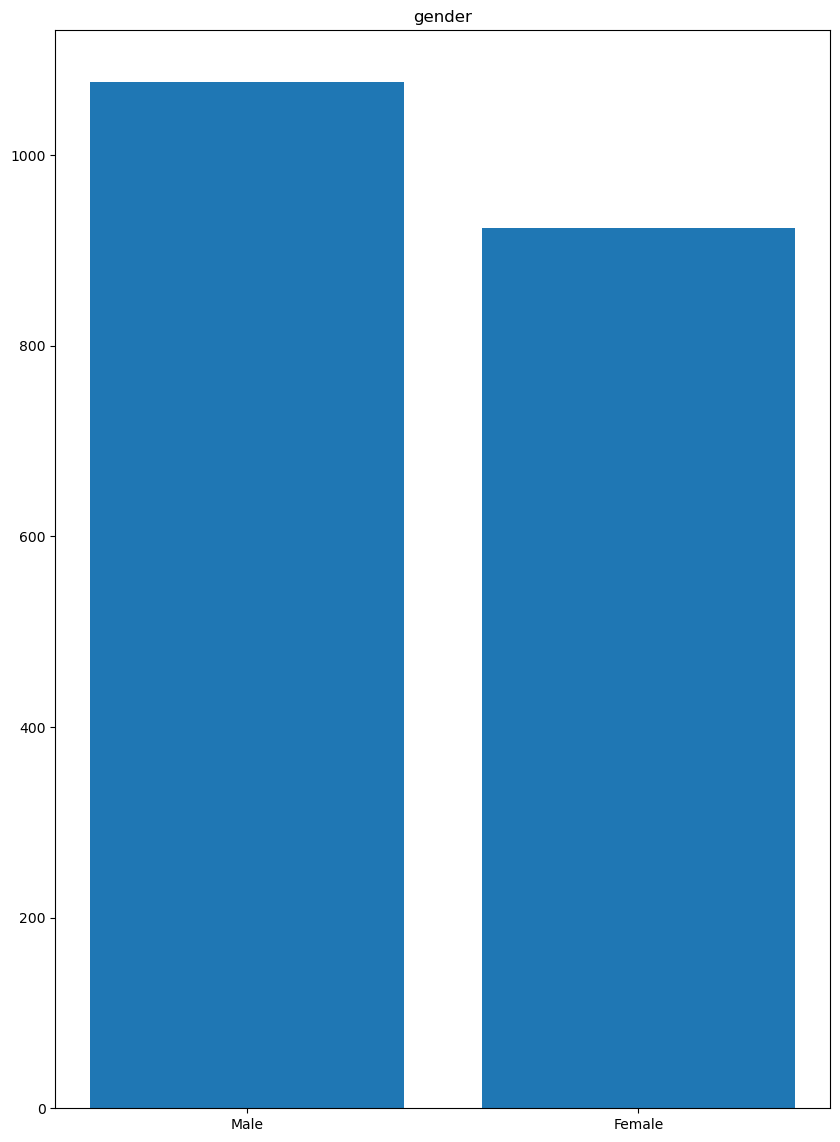

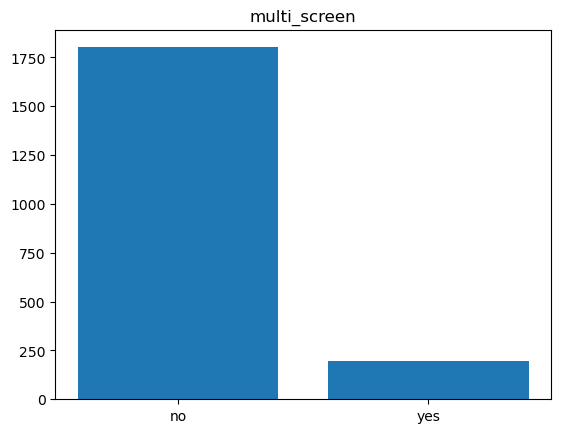

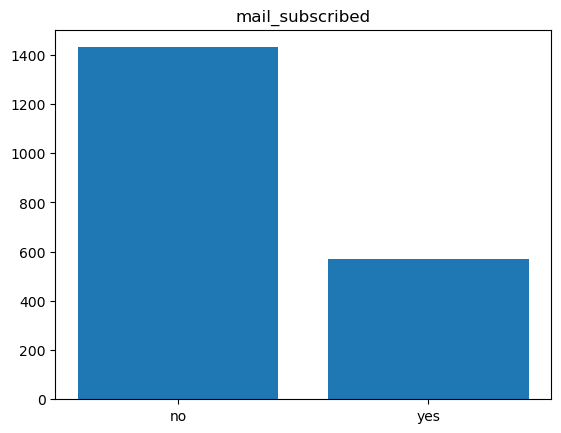

In [21]:
#univariate analysis
plt.figure(figsize=(10,14))
for i in cat:
    keys=churn_data[i].value_counts().keys()
    values=churn_data[i].value_counts().values
    plt.bar(keys,values)
    plt.title(i)
    plt.show()
    
    

**understandins**
- based on above bar charts we can understand that most of users are *Male*
- mails services are not subscribed so customer won't get information like :new offers,plans etc,,,

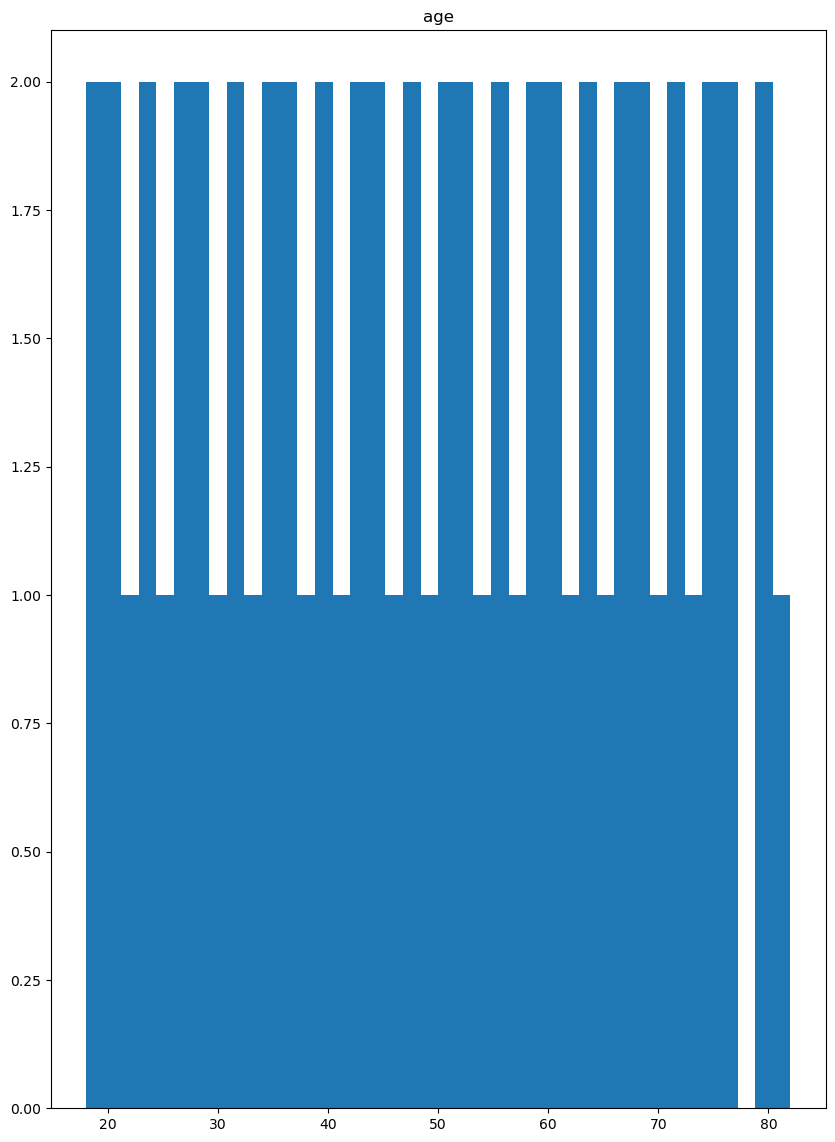

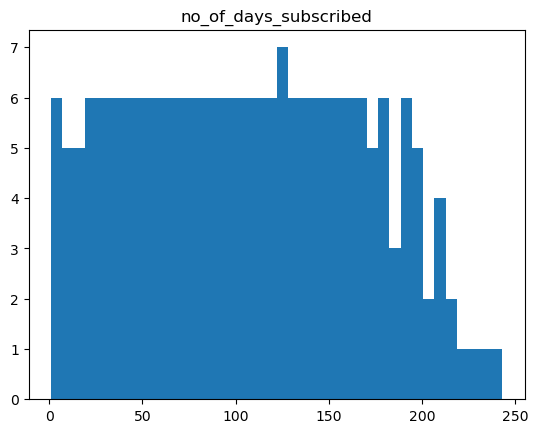

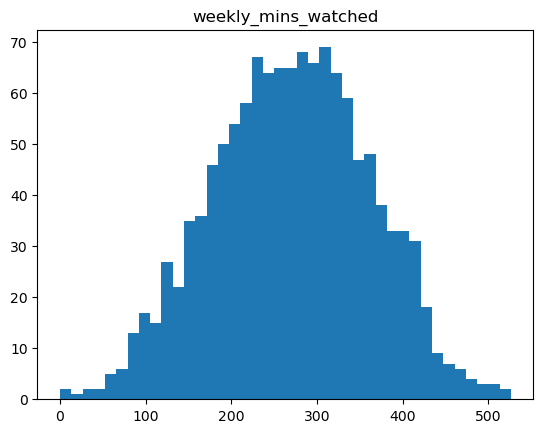

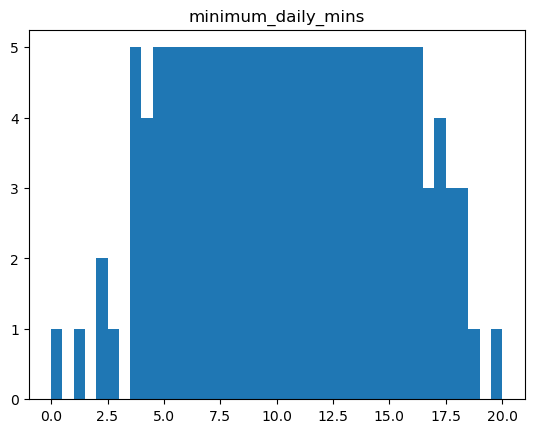

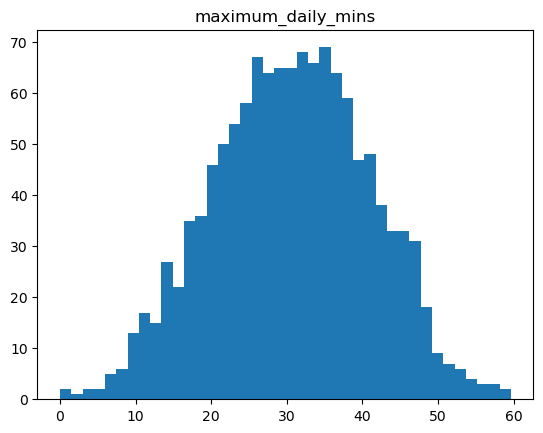

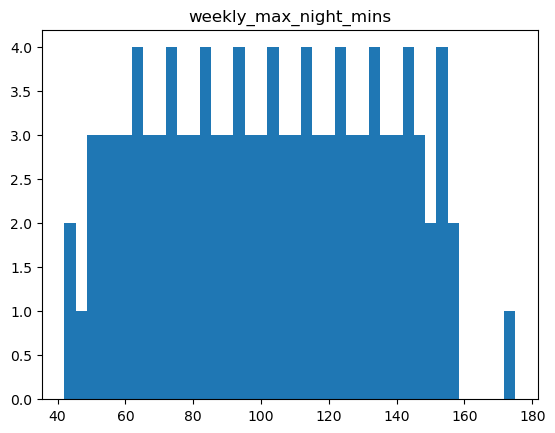

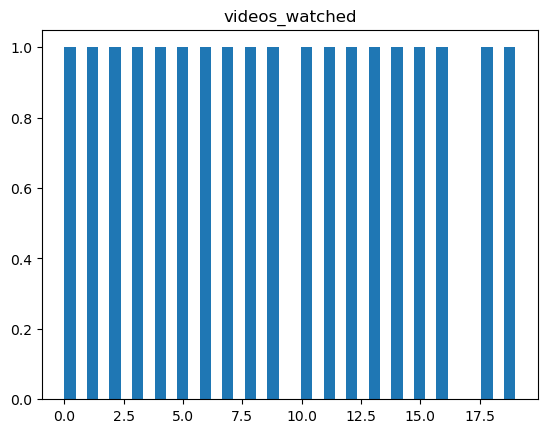

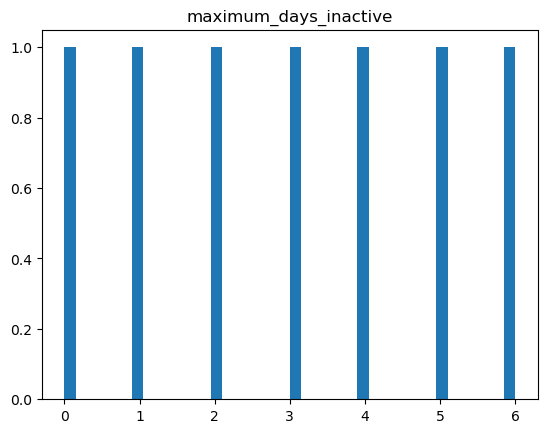

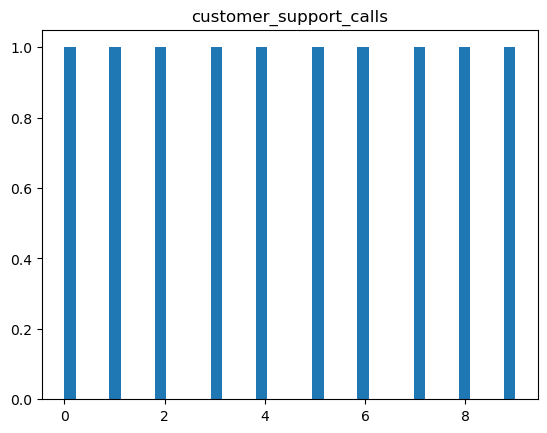

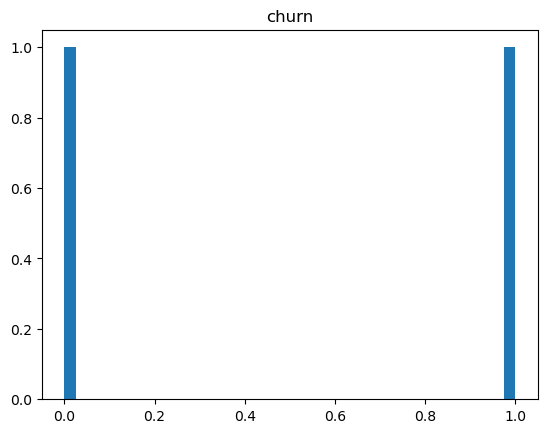

In [23]:
plt.figure(figsize=(10,14))
for i in num:
    keys=churn_data[i].value_counts().keys()
    values=churn_data[i].value_counts().values
    plt.hist(keys,bins=40)
    plt.title(i)
    plt.show()

**Understanings**
- there is skewness ,data is not normally distributed

**bi-variate analysis**

In [26]:
labels=[i for i in cat]
labels

['gender', 'multi_screen', 'mail_subscribed']

In [27]:
#cat vs cat
col1=churn_data['gender']
col2=churn_data['multi_screen']
col3=churn_data['mail_subscribed']
idx=col1
cols=[col2,col3]
p1=pd.crosstab(idx,cols)


In [28]:
idx1=col2
cols1=[col1,col3]
idx2=col3
cols2=[col1,col2]
p2=pd.crosstab(idx1,col1)
p3=pd.crosstab(idx2,col2)

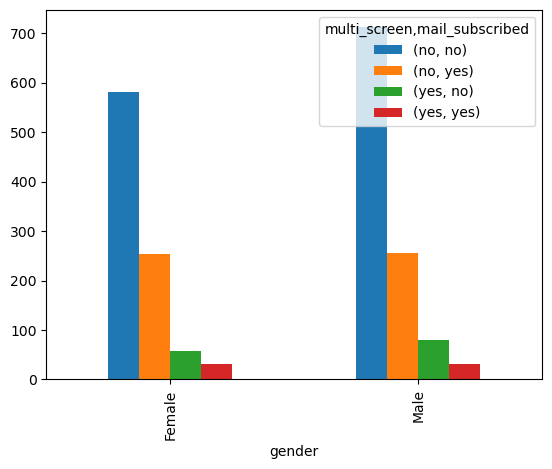

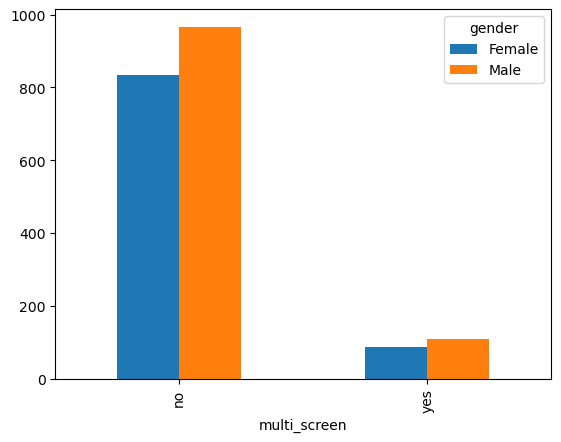

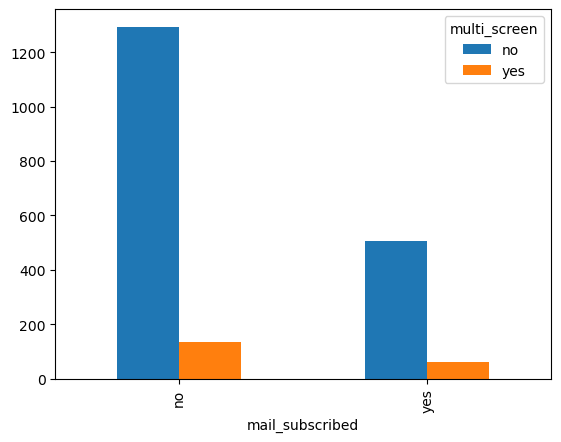

In [29]:
p1.plot(kind='bar')
p2.plot(kind='bar')
p3.plot(kind='bar')
plt.show()

In [30]:
p={}
target=churn_data['churn']
for i in cat:
   p[i]=pd.crosstab(churn_data[i],target)

Text(0.5, 1.0, 'mail subscribe vs target')

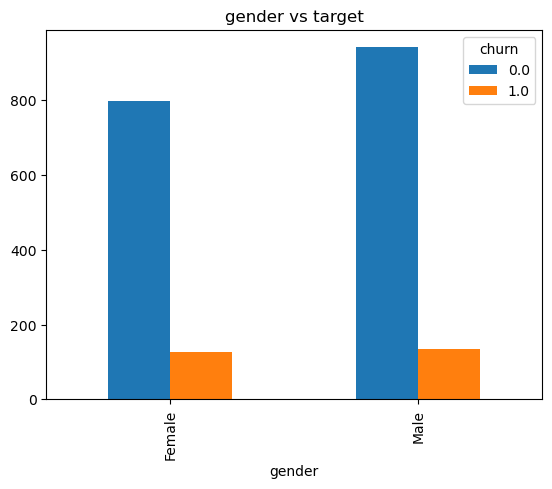

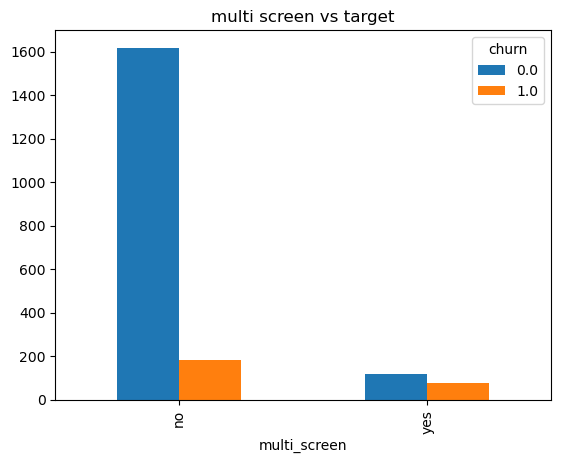

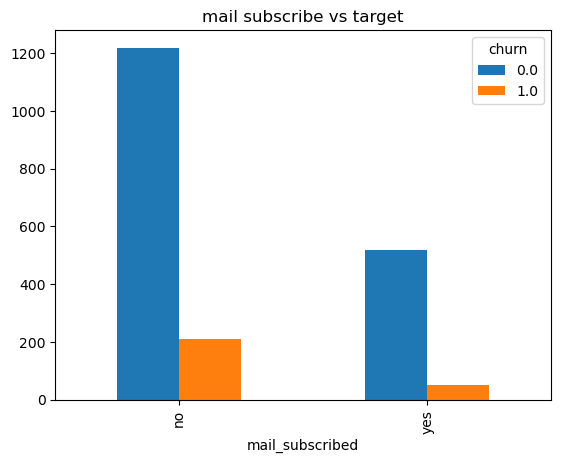

In [31]:
p['gender'].plot(kind='bar')
plt.title('gender vs target')
p['multi_screen'].plot(kind='bar')
plt.title('multi screen vs target')
p['mail_subscribed'].plot(kind='bar')
plt.title('mail subscribe vs target')

In [32]:
num

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

In [33]:
label=[i for i in num]
target=churn_data['churn']

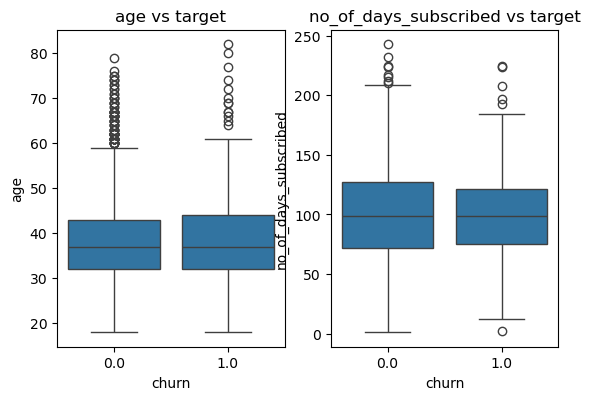

In [34]:
plt.figure(figsize=(10,14))
for i in range(len(labels[1:10])):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=label[i],x=target,data=churn_data,vert=True)
    plt.title(f'{label[i]} vs target')

In [35]:
corr=churn_data.corr(numeric_only=True)

<Axes: >

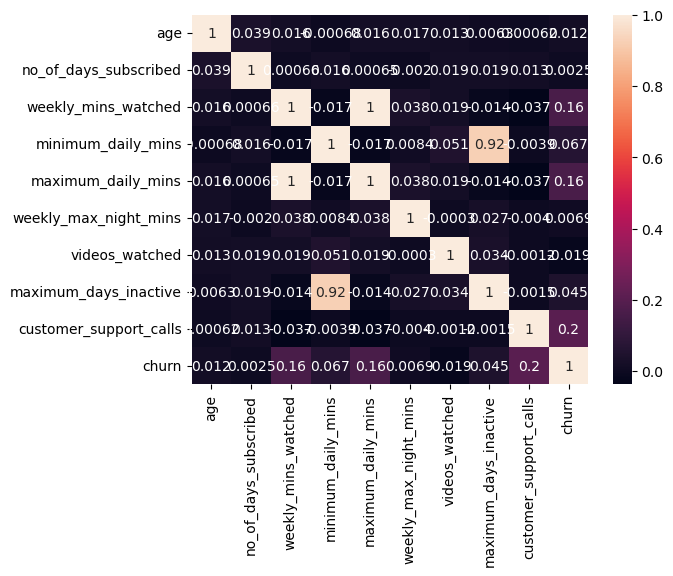

In [36]:
sns.heatmap(corr,annot=True)

- BASED ON THE HEATMAP WE CAN UNDERSTAND
   - MAX_DAYS INACTIVE,MIN_DAILY MINUTES AND MAXDAILY MINS AND WEEKLY MINS WATCHED ARE HIGHLY CORRELATED
   - CUSTOMER SUPPORT CALLS,MAX DAILY MINS,WEEKLY MINS ARE CORRELATED WITH TARGET VARIABLE

 #outlier analysis
 

In [39]:
for i in num:
    Q1=np.percentile(churn_data[i],25)
    Q2=np.percentile(churn_data[i],50)
    Q3=np.percentile(churn_data[i],75)
    IQR=Q3-Q1
    lb=Q1-1.5*IQR
    ub=Q3+1.5*IQR
    con=(churn_data[i]<lb)|(churn_data[i]>ub)
    outliers=churn_data[con]
    print(i,len(outliers))

age 63
no_of_days_subscribed 11
weekly_mins_watched 18
minimum_daily_mins 25
maximum_daily_mins 18
weekly_max_night_mins 9
videos_watched 51
maximum_days_inactive 24
customer_support_calls 161
churn 262


**understanding**
- the outliers are less than 3% of original data so keeping them as it is

**Encoding**
- converting categorical values into numerical using label encoder

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
for i in cat:
    churn_data[i]=le.fit_transform(churn_data[i])
churn_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,1,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,1,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,1,40,94,0,0,178.05,10.4,20.18,100,6,3.0,3,0.0


**scaling**

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [46]:
for i in num[:9]:
    churn_data[i]=ss.fit_transform(churn_data[[i]])

In [47]:
churn_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,-0.263675,-0.949794,0,0,-1.512805,0.718645,-1.513198,-0.943196,-1.400222,0.936875,-0.416022,0.0
1,0,0.030332,1.239136,0,0,0.301392,-0.897256,0.301222,-0.687109,-0.596074,-0.307315,0.344530,0.0
2,0,2.578388,0.660453,0,0,-2.270893,0.610919,-2.271398,-0.482239,-1.400222,0.936875,2.626185,1.0
3,0,-1.439701,0.786254,0,1,0.634802,-0.250896,0.634304,0.081154,-0.194001,-0.307315,1.105082,0.0
4,0,0.128334,2.295860,0,0,-0.337488,0.251829,-0.337550,-0.891979,1.012221,-0.307315,-0.416022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1.500364,-0.622713,0,1,-1.091852,0.395465,-1.091367,-0.174933,0.208073,0.936875,0.344530,0.0
1996,1,0.618345,0.685613,0,0,0.040625,-0.322714,0.040454,0.798199,-0.596074,-0.307315,-0.416022,0.0
1997,1,1.402362,-0.144671,0,0,-1.754946,1.939549,-1.755340,0.490894,4.630885,2.181065,-1.176574,0.0
1998,1,0.128334,-0.144671,0,0,-1.144005,0.072285,-1.143959,-0.021281,0.610147,-0.307315,1.105082,0.0


In [48]:
cor=churn_data.corr(numeric_only=True)

<Axes: >

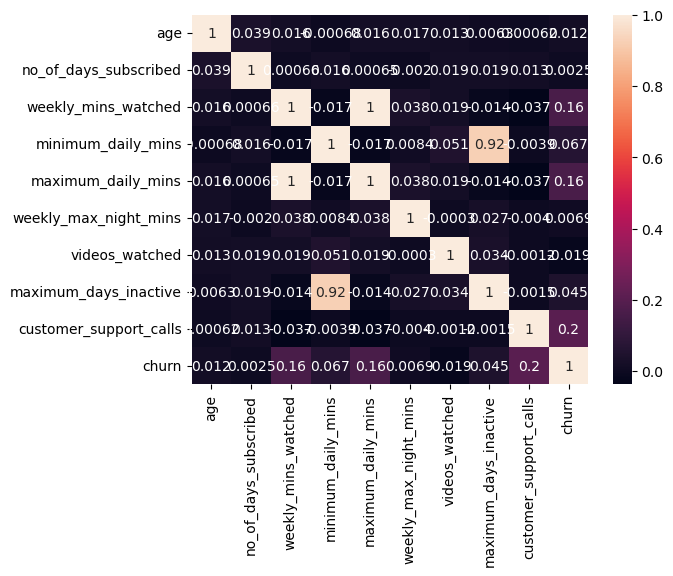

In [49]:
sns.heatmap(corr,annot=True)

**based on the heatmap i'm dropping minimum daily mins,maaximum daily mins and i'm keeping customer support calls as it is correlated to target variable**

In [51]:
churn_data = churn_data.drop(['minimum_daily_mins','maximum_daily_mins'], axis=1)
churn_data

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,-0.263675,-0.949794,0,0,-1.512805,-0.943196,-1.400222,0.936875,-0.416022,0.0
1,0,0.030332,1.239136,0,0,0.301392,-0.687109,-0.596074,-0.307315,0.344530,0.0
2,0,2.578388,0.660453,0,0,-2.270893,-0.482239,-1.400222,0.936875,2.626185,1.0
3,0,-1.439701,0.786254,0,1,0.634802,0.081154,-0.194001,-0.307315,1.105082,0.0
4,0,0.128334,2.295860,0,0,-0.337488,-0.891979,1.012221,-0.307315,-0.416022,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1.500364,-0.622713,0,1,-1.091852,-0.174933,0.208073,0.936875,0.344530,0.0
1996,1,0.618345,0.685613,0,0,0.040625,0.798199,-0.596074,-0.307315,-0.416022,0.0
1997,1,1.402362,-0.144671,0,0,-1.754946,0.490894,4.630885,2.181065,-1.176574,0.0
1998,1,0.128334,-0.144671,0,0,-1.144005,-0.021281,0.610147,-0.307315,1.105082,0.0


**model development**

In [53]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [54]:
X=churn_data.drop('churn',axis=1)
Y=churn_data['churn']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

making sure the train and test are of same dimensions

In [57]:
x_train.shape,y_train.shape

((1600, 10), (1600,))

In [58]:
x_test.shape,y_test.shape

((400, 10), (400,))

In [59]:
LR.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_pred=LR.predict(x_test)

In [61]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**model Evaluation**

In [63]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay


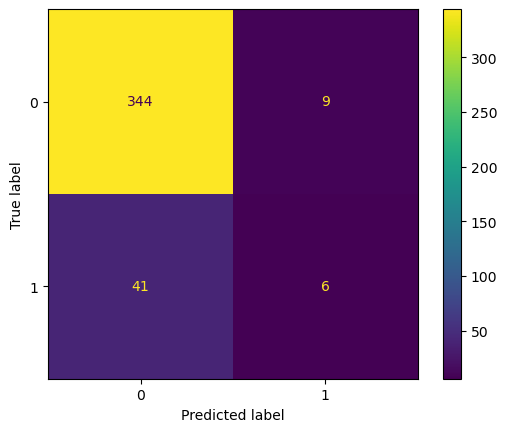

In [64]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
confmat=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confmat)
disp.plot()

In [65]:
acc,prec,rec

(0.875, 0.4, 0.1276595744680851)

residual vs fitted plot

In [67]:
error=y_test-y_pred

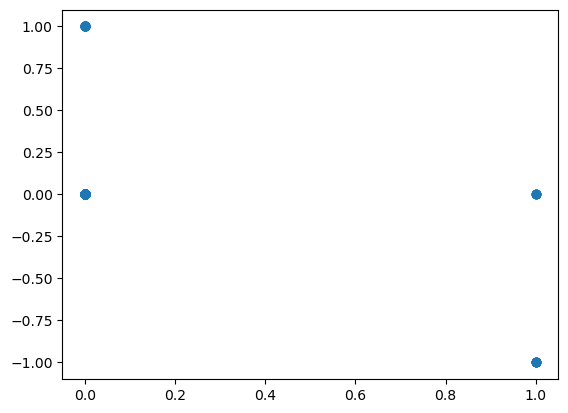

In [68]:
plt.scatter(y_pred,error)

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,accuracy_score,precision_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
dt=DecisionTreeClassifier()

In [124]:
X=churn_data.drop('churn',axis=1)
Y=churn_data['churn']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [126]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [128]:
y_pred=dt.predict(x_test)

In [130]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [132]:
dt_acc=accuracy_score(y_test,y_pred)
dt_prec=precision_score(y_test,y_pred)
dt_rec=recall_score(y_test,y_pred)
conf=confusion_matrix(y_test,y_pred)
dt_cm=ConfusionMatrixDisplay(conf)

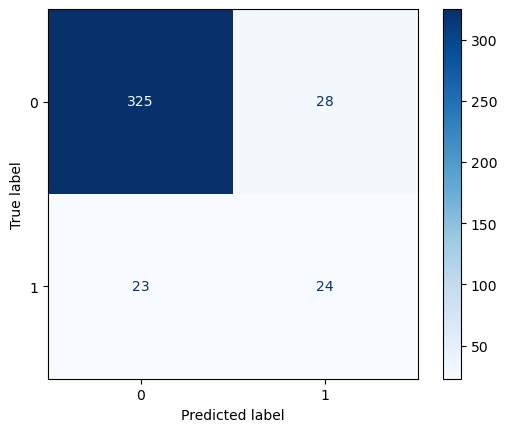

In [142]:
dt_cm.plot(cmap='Blues')

In [144]:
dt_acc,dt_prec,dt_prec

(0.8725, 0.46153846153846156, 0.46153846153846156)

In [148]:
Error=y_test-y_pred
Error

1860    1.0
353     0.0
1333    0.0
905     0.0
1289    0.0
       ... 
965     0.0
1284    0.0
1739    0.0
261     0.0
535     0.0
Name: churn, Length: 400, dtype: float64

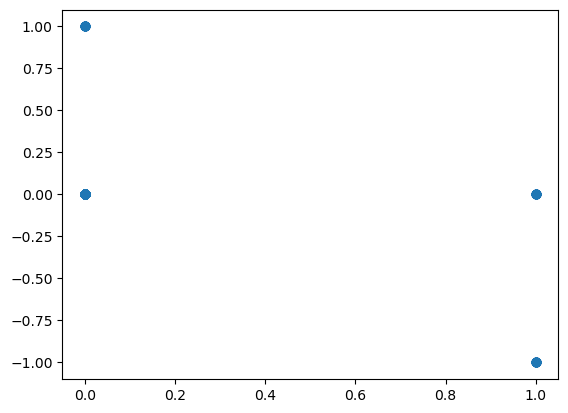

In [156]:
plt.scatter(y_pred,Error)

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
Rf=RandomForestClassifier()

In [160]:
X=churn_data.drop('churn',axis=1)
Y=churn_data['churn']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [162]:
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [164]:
y_pred=Rf.predict(x_test)

In [166]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [168]:
rf_acc=accuracy_score(y_test,y_pred)
rf_pre=precision_score(y_test,y_pred)
rf_rec=recall_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
rf_cmat=ConfusionMatrixDisplay(cm)


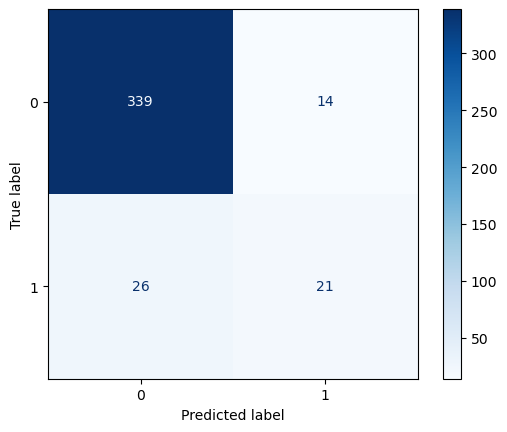

In [170]:
rf_cmat.plot(cmap='Blues')

In [172]:
rf_acc,rf_pre,rf_rec

(0.9, 0.6, 0.44680851063829785)

In [178]:
d1=[acc,prec,rec]
d2=[dt_acc,dt_prec,dt_rec]
d3=[rf_acc,rf_pre,rf_rec]

df=pd.DataFrame(zip(d1,d2,d3),columns=['LogisticRegression','DecisionTree','RandomForest'],index=['Accuracy','Precision','Recall'])
df

,LogisticRegression,DecisionTree,RandomForest
Accuracy,0.87500,0.872500,0.900000
Precision,0.40000,0.461538,0.600000
Recall,0.12766,0.510638,0.446809


In [180]:
import joblib as jb

In [184]:
loc='churn.joblib'
d={'model':Rf,'cols':x_test.columns}
jb.dump(d,loc)

['churn.joblib']